## Práctica 4: Análisis de Ventas
Con un dataset de ventas de tiendas vamos a intentar encontrar cuáles son las tiendas que históricamente más han vendido. Para esto intentaremos hacer un gráfico de líneas con las ventas por mes del TOP 5 de las tiendas. Resaltaremos en este gráfico una tienda que tiene un comportamiento interesante.

### Objetivo
- Cuáles son las tiendas que han tenido un mayor número de ventas históricamente y cómo ha sido su evolución a lo largo del tiempo?

### Referencias
- https://seaborn.pydata.org/generated/seaborn.lineplot.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://github.com/lkuffo/data-viz/blob/main/PRACTICAS/practica4.ipynb

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/tienda_ventas.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0
1,1,2013-01-01,1,BABY CARE,0.00000,0
2,2,2013-01-01,1,BEAUTY,0.00000,0
3,3,2013-01-01,1,BEVERAGES,0.00000,0
4,4,2013-01-01,1,BOOKS,0.00000,0
...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0


In [3]:
# Miramos cuantas tiendas tenemos

len(df['store_nbr'].unique())

54

In [4]:
# Analizamos las fechas
len(df['date'].unique())

1213

In [5]:
# reduccion del alcance del analisis
# Creamos una columna mes
df['mes'] = df['date'].apply(lambda x: x[:7])
df

,id,date,store_nbr,family,sales,onpromotion,mes
0,0,2013-01-01,1,AUTOMOTIVE,0.00000,0,2013-01
1,1,2013-01-01,1,BABY CARE,0.00000,0,2013-01
2,2,2013-01-01,1,BEAUTY,0.00000,0,2013-01
3,3,2013-01-01,1,BEVERAGES,0.00000,0,2013-01
4,4,2013-01-01,1,BOOKS,0.00000,0,2013-01
...,...,...,...,...,...,...,...
2161561,2161561,2016-04-30,9,POULTRY,826.35300,0,2016-04
2161562,2161562,2016-04-30,9,PREPARED FOODS,165.65399,0,2016-04
2161563,2161563,2016-04-30,9,PRODUCE,2012.72700,1,2016-04
2161564,2161564,2016-04-30,9,SCHOOL AND OFFICE SUPPLIES,10.00000,0,2016-04


In [6]:
len(df['mes'].unique())

40

In [7]:
# reducimos el analisis de la cantidad de tiendas
agrupado_tiendas = df.groupby('store_nbr').agg({
    'sales': 'sum'
})
agrupado_tiendas

,sales
store_nbr,
1,9.181626e+06
2,1.410272e+07
3,3.267186e+07
4,1.247039e+07
5,1.087617e+07
6,1.655468e+07
7,1.720570e+07
8,1.975790e+07
9,1.752849e+07


In [8]:
agrupado_tiendas.describe()

,sales
count,5.400000e+01
mean,1.269988e+07
std,8.858355e+06
min,0.000000e+00
25%,7.091574e+06
50%,1.063859e+07
75%,1.625086e+07
max,4.063205e+07


<Axes: >

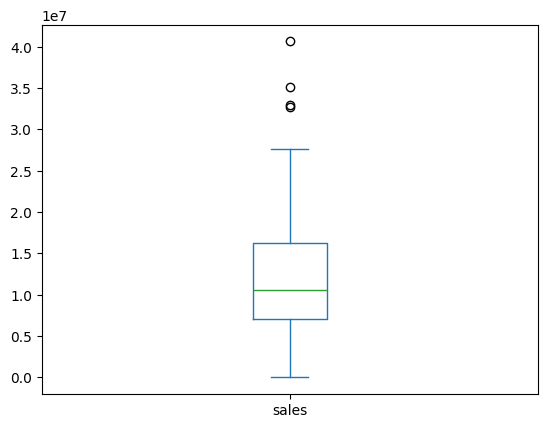

In [9]:
# Podemos hacer un diagrama de cajas
agrupado_tiendas.plot.box()

<Axes: ylabel='Frequency'>

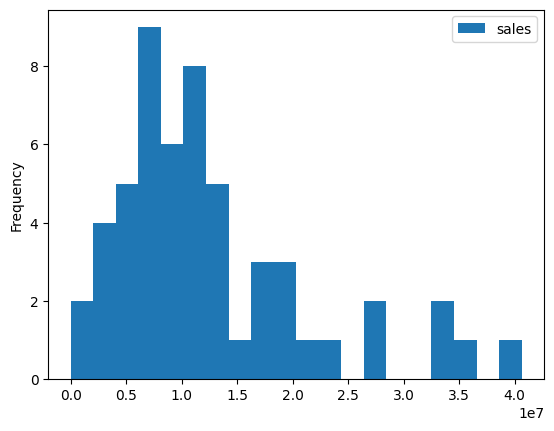

In [10]:
agrupado_tiendas.plot.hist(bins=20)

In [11]:
# Ordenamos las vnetas de las tiendas
agrupado_tiendas.sort_values('sales', ascending=False)

,sales
store_nbr,
44,4.063205e+07
45,3.511369e+07
47,3.292287e+07
3,3.267186e+07
46,2.766196e+07
49,2.645239e+07
48,2.392486e+07
51,2.179748e+07
8,1.975790e+07


In [12]:
# Seleccionamos los indices del top 5 de ventas
top_5_tiendas = [44, 45, 47, 3, 46]

In [13]:
# Se filtra el dataframe original para analizar la info del top 5 de tiendas
df_top_5 = df[df['store_nbr'].isin(top_5_tiendas)]
df_top_5

,id,date,store_nbr,family,sales,onpromotion,mes
726,726,2013-01-01,3,AUTOMOTIVE,0.000,0,2013-01
727,727,2013-01-01,3,BABY CARE,0.000,0,2013-01
728,728,2013-01-01,3,BEAUTY,0.000,0,2013-01
729,729,2013-01-01,3,BEVERAGES,0.000,0,2013-01
730,730,2013-01-01,3,BOOKS,0.000,0,2013-01
...,...,...,...,...,...,...,...
2161165,2161165,2016-04-30,47,POULTRY,1687.844,1,2016-04
2161166,2161166,2016-04-30,47,PREPARED FOODS,431.271,0,2016-04
2161167,2161167,2016-04-30,47,PRODUCE,7533.308,1,2016-04
2161168,2161168,2016-04-30,47,SCHOOL AND OFFICE SUPPLIES,11.000,0,2016-04


In [15]:
# Agrupamos ahora por mes tienda y ventas
top_5_por_mes = df_top_5.groupby(['store_nbr', 'mes']).agg({
    'sales': 'sum'
})
top_5_por_mes

sales
store_nbr mes                  
3         2013-01  4.965743e+05
          2013-02  4.296186e+05
          2013-03  5.316862e+05
          2013-04  5.120721e+05
          2013-05  5.181973e+05
...                         ...
47        2015-12  1.264874e+06
          2016-01  1.154481e+06
          2016-02  1.028481e+06
          2016-03  1.078566e+06
          2016-04  1.158896e+06

[200 rows x 1 columns]

In [16]:
top_5_por_mes = top_5_por_mes.reset_index()
top_5_por_mes

,store_nbr,mes,sales
0,3,2013-01,4.965743e+05
1,3,2013-02,4.296186e+05
2,3,2013-03,5.316862e+05
3,3,2013-04,5.120721e+05
4,3,2013-05,5.181973e+05
...,...,...,...
195,47,2015-12,1.264874e+06
196,47,2016-01,1.154481e+06
197,47,2016-02,1.028481e+06
198,47,2016-03,1.078566e+06


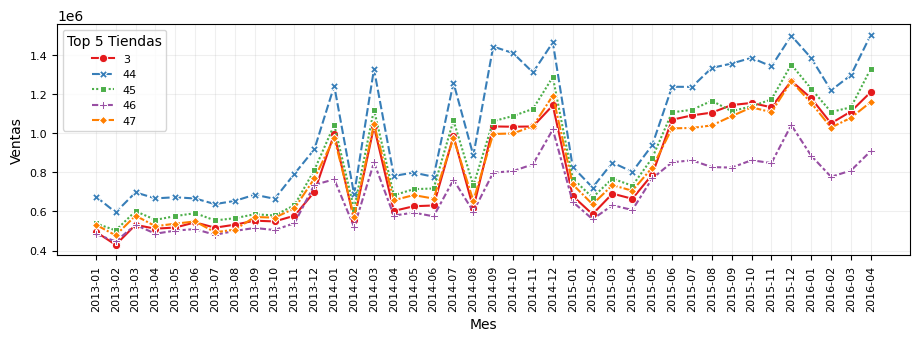

In [29]:
ax = sns.lineplot(
    data = top_5_por_mes,
    x = 'mes',
    y = 'sales',
    hue = 'store_nbr', # diferencia categorias en un grafico
    style = 'store_nbr', # diferencia el tipo de linea de cada tienda
    markers = True, # Da un marcador difrente a cada una de las lineas
    palette = 'Set1'
)

ax.tick_params(
    axis = 'x',
    labelrotation = 90,
    labelsize = 8
)

ax.tick_params(
    axis = 'y',
    labelsize = 8
)

ax.grid(
    visible = True,
    axis = 'x',
    alpha = 0.2
)

ax.grid(
    visible = True,
    axis = 'y',
    alpha = 0.2
)

ax.legend(
    title = 'Top 5 Tiendas',
    fontsize = 8
)

ax.set_ylabel('Ventas')
ax.set_xlabel('Mes')

# Otro metodo para cambiar el tamanio del canvas
fig = ax.get_figure()
fig.set_size_inches(11, 3)

#

In [30]:
top_5_tiendas

[44, 45, 47, 3, 46]

Para dar mayor personalizacion vamos a graficar linea por linea en un ciclo for para ir dando caracteristicas difrentes a cada una.

In [32]:
# definimos unos estilos para las lineas
# [color, opacidad, estilo de marcadores, estilo de linea, ancho de linea ]

estilos_por_tienda = {
    44: ['grey', 0.4, '+', '--', 1],
    45: ['grey', 0.4, 's', '--', 1],
    47: ['grey', 0.4, 'x', '--', 1],
    3: ['red', 1, 'o', '-', 1.5],
    46: ['grey', 0.4, 'D', '--', 1]
}

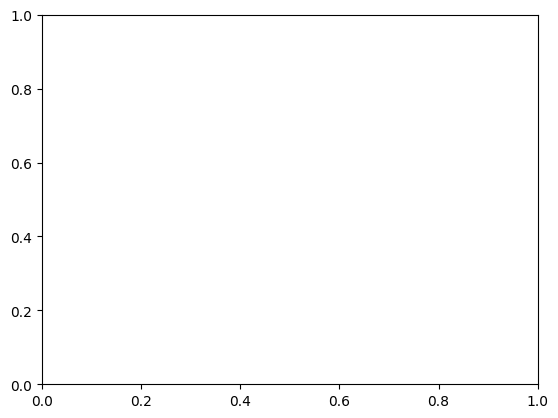

In [33]:
fig2, ax2 = plt.subplots() # Se define un subplot sin parametros para que sea 1X1


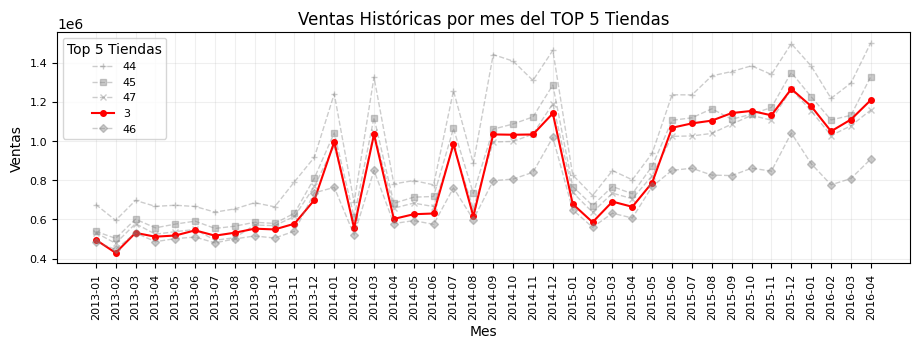

In [38]:
fig2, ax2 = plt.subplots() # Se define un subplot sin parametros para que sea 1X1

for tienda in top_5_tiendas:
    estilos = estilos_por_tienda[tienda] # escoge un estilo por vez
    df_tmp = top_5_por_mes[top_5_por_mes['store_nbr'] == tienda] # filtra en cada iteracion por tienda
    ax2.plot(
        df_tmp['mes'], 
        df_tmp['sales'],
        label = tienda,
        markersize = 4,
        color = estilos[0],
        alpha = estilos[1],
        marker = estilos[2],
        linestyle = estilos[3],
        linewidth = estilos[4],
    )

ax2.tick_params(
    axis = 'x',
    labelrotation = 90,
    labelsize = 8
)

ax2.tick_params(
    axis = 'y',
    labelsize = 8
)

ax2.grid(
    visible = True,
    axis = 'x',
    alpha = 0.2
)

ax2.grid(
    visible = True,
    axis = 'y',
    alpha = 0.2
)

ax2.legend(
    title = 'Top 5 Tiendas',
    fontsize = 8
)

ax2.set_ylabel('Ventas')
ax2.set_xlabel('Mes')
ax2.set_title('Ventas Históricas por mes del TOP 5 Tiendas')

fig2.set_size_inches(11, 3)


